In [931]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Definicion de la funcion

Text(0, 0.5, 'Amplitud')

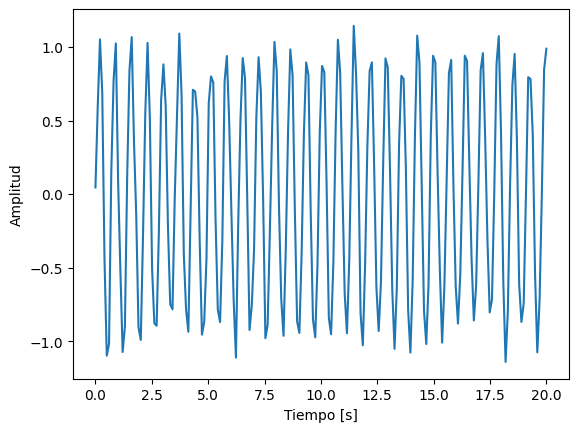

In [932]:
t = np.linspace(0,20,200)
y=np.sin(2*np.pi*np.sqrt(2)*t)
y+=np.random.normal(0.0,0.1,len(y))
plt.plot(t,y,"-")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")



Limite Nyquist para la frecuencia

In [933]:
Ny=1/((t[1]-t[0]))
Ny

np.float64(9.95)

Ecuacion de Fourier solo para una frecuencia

In [934]:
def fourier(t,y,f):
    F=0
    for i in range (len(t)):
        F+=y[i]*np.exp(-2*np.pi*1j*f*t[i])
    return(F)
f=49.95
print(fourier(t,y,f))

(0.37394478827239863-1.3456683102133618j)


Norma de la transformada de fourier en el barrido de frecuencias

91.9722003058134


Text(0, 0.5, 'Amplitud')

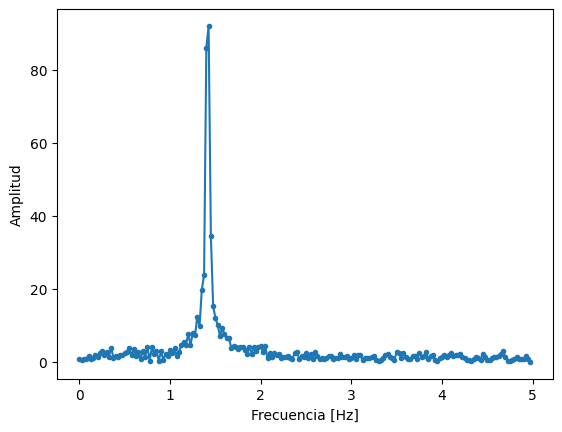

In [935]:
frecuencias=np.linspace(0,Ny/2,len(t))

FF=[]

for i in range(len(frecuencias)):
    a=frecuencias[i]
    FS=fourier(t,y,a)
    FF.append(FS)

FF=np.abs(FF)

print(np.max(FF))

#plt.scatter(frecuencias,FF)
plt.plot(frecuencias,FF,".-")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")



El punto maximo de fourier(f) es 87.24096338746959 y cuanod se le aplica el ruido en la funcion (y) este se convierte en 86.12438764631756 

Ademas si se le agrega ruido a la señal en (y) entonces la funcion de fourier se nota mas dispersa pero siguen existiendo los mismos picos con una pequeña diferencia en el maximo

[0.06482648]


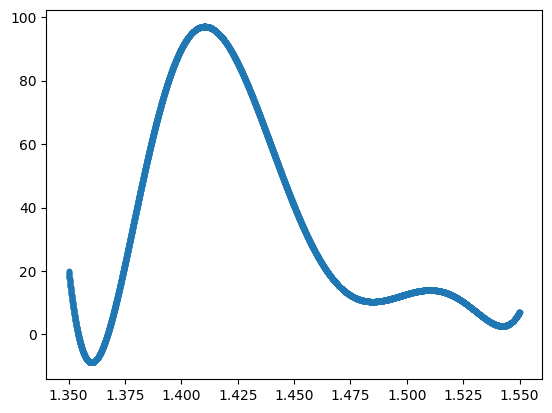

In [936]:

#for i in range(1):
numero=np.max(FF)/2
maximo=np.where(FF==numero)
Lista_x=[frecuencias[54],frecuencias[55],frecuencias[56],frecuencias[57],frecuencias[58],frecuencias[59],frecuencias[60],frecuencias[61],frecuencias[62]]
Lista_y=[FF[54],FF[55],FF[56],FF[57],FF[58],FF[59],FF[60],FF[61],FF[62]]

coeficientes = np.polyfit(Lista_x, Lista_y, 6)
polinomio = np.poly1d(coeficientes)
x_ajustado = np.linspace(min(Lista_x), max(Lista_x), 10000)
y_ajustado = polinomio(x_ajustado)
plt.plot(x_ajustado,y_ajustado,".-")

diferencia=np.abs(numero-y_ajustado)
lista=sorted(diferencia)
numero1=np.where(diferencia==lista[0])
numero2=np.where(diferencia==lista[1])
#numero3=np.where(diferencia==lista[2])
#numero4=np.where(diferencia==lista[3])

lista1=[numero1,numero2]
numeros=[]
for i in lista1:
    numero=x_ajustado[i]
    numeros.append(numero)


fwhm=abs(numeros[1]-numeros[0])
print(fwhm)




El ancho a media altura es aproximadamente 0.0647 a 0.0651